# Interazione con la PA

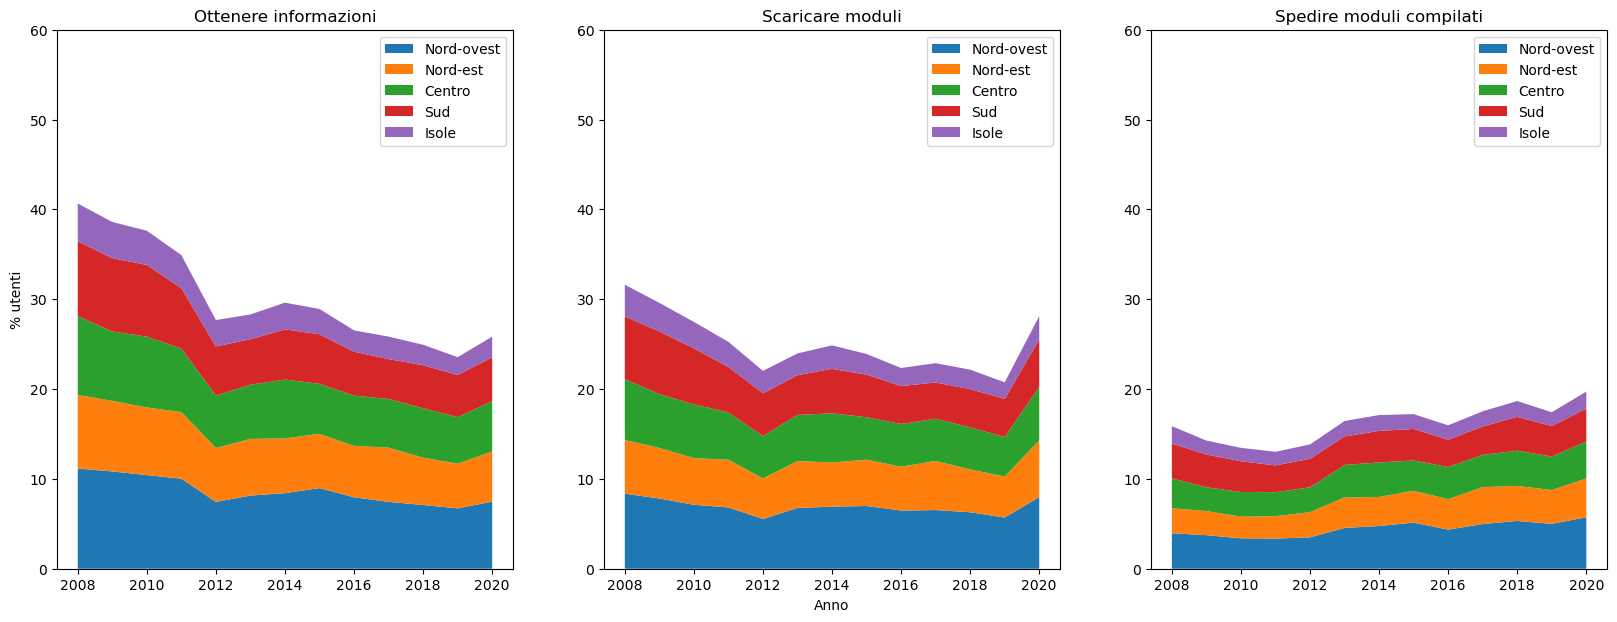

In [1]:
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

zones = ['Nord-ovest', 'Nord-est', 'Centro', 'Sud', 'Isole']

pop = pd.read_csv('data/popolazione.csv')
pop = pop.loc[
    list(map(lambda x: x in zones or x == 'Italia', pop['Territorio'])) & 
    (pop['Sesso'] == 'totale') &
    (pop['Età'] == 'totale')
]

intpa = pd.read_csv('data/interazione_con_la_PA.csv')
intpaz = intpa.loc[map(lambda x: x in zones, intpa['Territorio'])]
intpaz

types = list(set(intpaz['Tipo dato'].values))

intpazn = intpaz.copy()

for z in zones:
    m = interp1d(
        [0,100], 
        [0,100*pop.loc[pop['Territorio'] == z, 'Value'].iloc[0] / pop.loc[pop['Territorio'] == 'Italia', 'Value'].iloc[0]]
    )
    intpazn.loc[intpazn['Territorio'] == z, 'Value'] = m(intpazn.loc[intpazn['Territorio'] == z, 'Value'])

f, axs = plt.subplots(1,len(types))
f.set_figwidth(20)
f.set_figheight(7)

axs[0].set_ylabel("% utenti")
axs[1].set_xlabel("Anno")

years = list(set(intpazn['TIME'].values))
years.sort()

intpazn = intpazn.sort_values('TIME')

for i, t in enumerate(types): 
    ax = axs[i]
    ax.set_ylim(0,60)
    ax.set_title(t.capitalize())
    yd = intpazn.loc[intpazn['Tipo dato'] == t]\
        .groupby('Territorio')['Value']\
        .apply(list)\
        .to_dict()
    yd = {k:v for k,v in sorted(yd.items(), key=lambda e: zones.index(e[0]))}
    ax.stackplot(
        years,
        yd.values(),
        labels=yd.keys()
    )
    ax.legend()

plt.show()

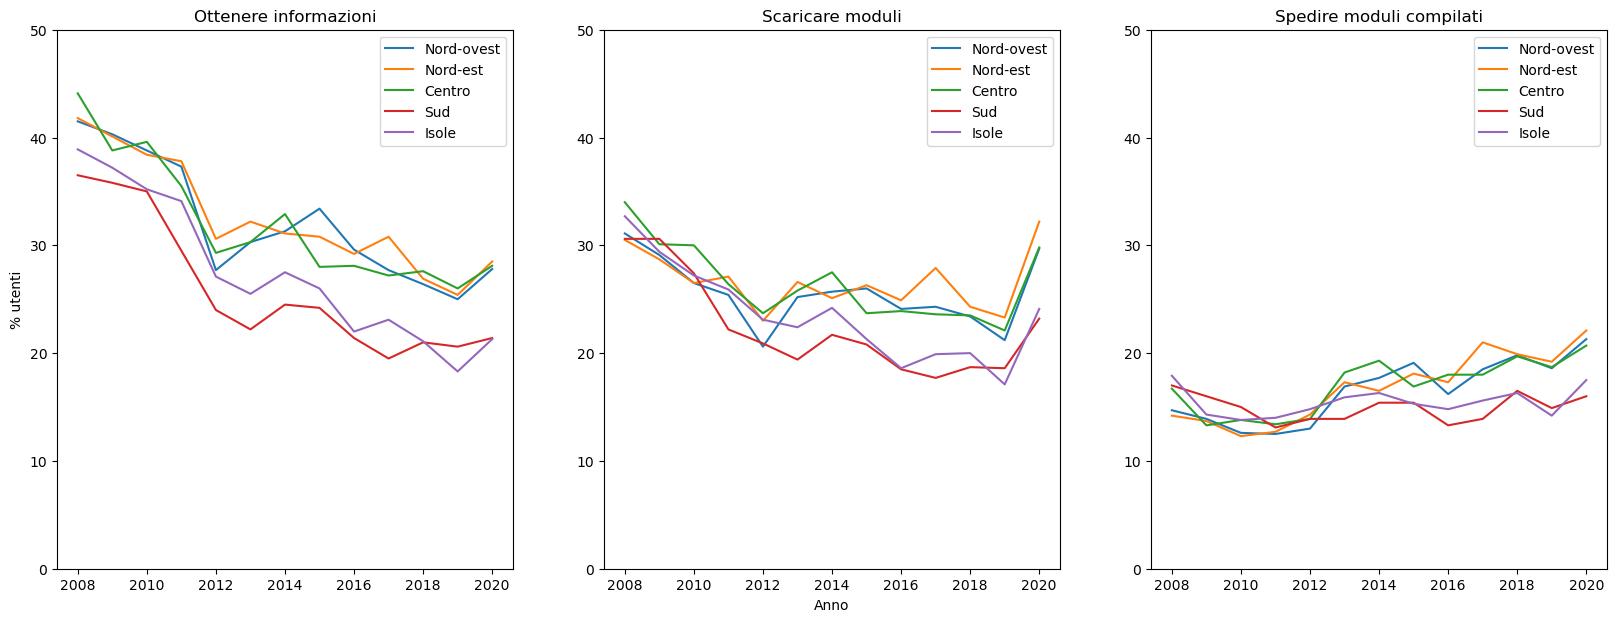

In [2]:
f, axs = plt.subplots(1,3)
f.set_figwidth(20)
f.set_figheight(7)

axs[0].set_ylabel("% utenti")
axs[1].set_xlabel("Anno")

for i, t in enumerate(types):
    ax = axs[i]
    for z in zones:
        ax.set_ylim(0,50)
        ax.plot(
            years,
            intpaz.loc[(intpaz['Territorio'] == z) & (intpaz['Tipo dato'] == t), 'Value'],
            label=z
        )
    ax.set_title(t.capitalize())
    ax.legend()
plt.show()

# Correlazione diffusione internet e interazione con la PA

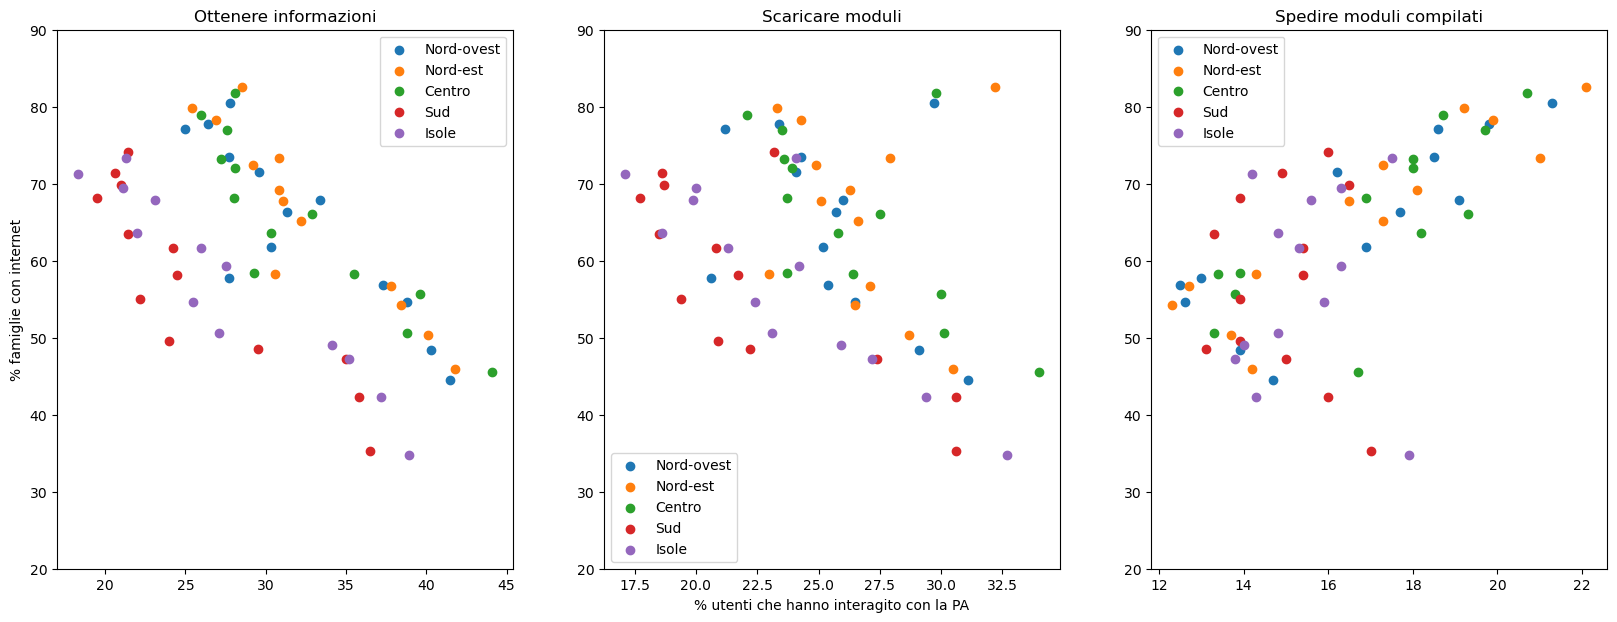

In [3]:
data = pd.read_csv("data/famiglie_e_accesso_ad_internet.csv")

datazsyes = data.loc[list(map(lambda x: x in zones, data['Territorio'])) & 
    (data['TIPO_DATO_SDS_ICT'] == 'FAM_INT_YES')]

mdf = pd.merge(intpaz,datazsyes,on=['TIME','Territorio'])
f, axs = plt.subplots(1, len(types))
axs[1].set_xlabel("% famiglie con connessione in casa")
axs[0].set_ylabel("% utilizzo")

f.set_figheight(7)
f.set_figwidth(20)

axs[1].set_xlabel("% utenti che hanno interagito con la PA")
axs[0].set_ylabel("% famiglie con internet")

for i, t in enumerate(types):
    ax = axs[i]
    ax.set_ylim(20,90)
    ax.set_title(t.capitalize())
    for z in zones:
        ax.scatter(
            mdf.loc[(mdf['Tipo dato_x'] == t) & (mdf['Territorio'] == z), 'Value_x'],
            mdf.loc[(mdf['Tipo dato_x'] == t) & (mdf['Territorio'] == z), 'Value_y'],
            label=z
        )
    ax.legend()